Keep categorical cross entropy, try RMSprop for optimizer      

In [ ]:
import sys
print(sys.version)

In [ ]:
gSize=6
dropoutGrid = np.random.uniform(0,.4, gSize)     #param1
LRGrid = 10 ** np.random.uniform(-6, 0, gSize)   #param2
L2penal1Grid = 10 ** np.random.uniform(-5, 0, gSize)  #param3
L2penal2Grid = 10 ** np.random.uniform(-5, 0, gSize)   #param4
optimizerGrid=['adam','RMSprop']   #param5
activationsGrid=['relu','elu']   #param6
neurons1=3**np.random.uniform(1,4,gSize)   #param7
neurons1Grid=[np.floor(i) for i in neurons1]
neurons2=3**np.random.uniform(1,4,gSize)   #param8
neurons2Grid=[np.floor(i) for i in neurons2]
neurons3=3**np.random.uniform(1,4,gSize)   #param9
neurons3Grid=[np.floor(i) for i in neurons3]
miniBatches=np.random.uniform(4,50,gSize)
miniBatchGrid=[np.floor(i) for i in miniBatches] #param12

kernelsLayer1=3**np.random.uniform(1,4,gSize)   
kernelsLayer1Grid=[np.floor(i) for i in kernelsLayer1] #param10

ratioBetweenKernels=np.random.uniform(1,2)   
kernelslay2=kernelsLayer1*ratioBetweenKernels
kernelsLayer2Grid=([np.floor(i) for i in kernelslay2])#param11

print (gSize**6)*2*2

In [ ]:
mixN=(gSize**6)*2*2
print(np.arange(len(dropoutGrid)))
print(np.arange(len(LRGrid)))
print(np.arange(len(L2penal1Grid)))
print(np.arange(len(optimizerGrid)))
print(np.arange(len(activationsGrid)))
print(np.arange(len(neurons1Grid)))
print(np.arange(len(miniBatchGrid)))
print(np.arange(len(kernelsLayer1Grid)))

In [ ]:
i=100


In [ ]:
print ratioBetweenKernels
for idx, i in enumerate(kernelsLayer1):
    print kernelsLayer1Grid[idx], kernelsLayer2Grid[idx]

In [1]:
modelName='p0006'

In [2]:
import numpy as np
import h5py
import copy
import time
import math
import random
import pickle
import pandas as pd
##
from keras.models import Sequential
from keras.layers import Merge
from keras.layers.convolutional import Convolution3D
from keras.layers.pooling import MaxPooling3D
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import SGD
import keras.backend as K
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
##
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score

Using TensorFlow backend.


In [3]:
############

def readScan(scan):
    # We read the file saved in Matlab. There is only one variable in the file called scansMini
    data = h5py.File(scan, 'r')
    Xscans=data.get('scansMini')
    # We have to get the values into the right format (subjects, dim1, dim2, dim3, channels)
    X=copy.copy(Xscans.value)
    X=np.expand_dims(X,4)
    X1=np.rollaxis(X,3)
    return X1
    
############

def readLabels(labels):
    data = h5py.File(labels, 'r')
    Xscans=data.get('labels')
    X=copy.copy(Xscans.value)
    X2=np.squeeze(X).astype(int)
    X3= np.zeros((len(X2), 2))
    X3[np.arange(len(X2)), X2] = 1
    return X3
    
############

def getScansFold(foldX,cubesNumber):
    foldName='fold{0}'.format(foldX)
    XTrain=[]
    XTest=[]
    for i in (np.arange(cubesNumber)+1):
        pathNameTrain=foldName+'/train/scansMiniTrain{0}.mat'.format(i)
        pathNameTest=foldName+'/test/scansMiniTest{0}.mat'.format(i)
        xtrain=readScan(pathNameTrain)
        xtest=readScan(pathNameTest)
        XTrain.append(xtrain)
        XTest.append(xtest)
    pathNameLabelTrain=foldName+'/train/labelsTrain.mat'
    pathNameLabelTest=foldName+'/test/labelsTest.mat'
    y=readLabels(pathNameLabelTrain)
    y_true=readLabels(pathNameLabelTest)
    return XTrain, XTest, y, y_true

In [4]:
#############

def restAllModels():
    final_model.reset_states()
    model1.reset_states()
    model2.reset_states()
    model3.reset_states()
    model4.reset_states()
    model5.reset_states()
    model6.reset_states()
    model7.reset_states()
    model8.reset_states()
    model9.reset_states()
    model10.reset_states()
    model11.reset_states()
    model12.reset_states()
    model13.reset_states()
    model14.reset_states()
    model15.reset_states()
    model16.reset_states()
    model17.reset_states()
    
###########

In [5]:
def defineModel(adam,conv1aW,conv1bW,conv1aN,conv1aInit,conv1aBorder,conv1aAct,fully1W,fully1N,fully1act,fully1init,
fully1drop,fully2N,fully2W,fully2init,fully2act,outInit,outAct,outW,Loss):


    ###########

    model1=Sequential()
    model1.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model1.add(BatchNormalization())
    model1.add(Activation(conv1aAct))
    model1.add(Flatten())
    model1.add(Dropout(fully1drop))
    model1.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model2=Sequential()
    model2.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder,  init=conv1aInit, W_regularizer=l2(conv1aW)))
    model2.add(BatchNormalization())
    model2.add(Activation(conv1aAct))
    model2.add(Flatten())
    model2.add(Dropout(fully1drop))
    model2.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model3=Sequential()
    model3.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder,  init=conv1aInit, W_regularizer=l2(conv1aW)))
    model3.add(BatchNormalization())
    model3.add(Activation(conv1aAct))
    model3.add(Flatten())
    model3.add(Dropout(fully1drop))
    model3.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model4=Sequential()
    model4.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder,  init=conv1aInit, W_regularizer=l2(conv1aW)))
    model4.add(BatchNormalization())
    model4.add(Activation(conv1aAct))
    model4.add(Flatten())
    model4.add(Dropout(fully1drop))
    model4.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model5=Sequential()
    model5.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model5.add(BatchNormalization())
    model5.add(Activation(conv1aAct))
    model5.add(Flatten())
    model5.add(Dropout(fully1drop))
    model5.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model6=Sequential()
    model6.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model6.add(BatchNormalization())
    model6.add(Activation(conv1aAct))
    model6.add(Flatten())
    model6.add(Dropout(fully1drop))
    model6.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model7=Sequential()
    model7.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder,  init=conv1aInit, W_regularizer=l2(conv1aW)))
    model7.add(BatchNormalization())
    model7.add(Activation(conv1aAct))
    model7.add(Flatten())
    model7.add(Dropout(fully1drop))
    model7.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model8=Sequential()
    model8.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model8.add(BatchNormalization())
    model8.add(Activation(conv1aAct))
    model8.add(Flatten())
    model8.add(Dropout(fully1drop))
    model8.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model9=Sequential()
    model9.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model9.add(BatchNormalization())
    model9.add(Activation(conv1aAct))
    model9.add(Flatten())
    model9.add(Dropout(fully1drop))
    model9.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model10=Sequential()
    model10.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model10.add(BatchNormalization())
    model10.add(Activation(conv1aAct))
    model10.add(Flatten())
    model10.add(Dropout(fully1drop))
    model10.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model11=Sequential()
    model11.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model11.add(BatchNormalization())
    model11.add(Activation(conv1aAct))
    model11.add(Flatten())
    model11.add(Dropout(fully1drop))
    model11.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model12=Sequential()
    model12.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model12.add(BatchNormalization())
    model12.add(Activation(conv1aAct))
    model12.add(Flatten())
    model12.add(Dropout(fully1drop))
    model12.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model13=Sequential()
    model13.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model13.add(BatchNormalization())
    model13.add(Activation(conv1aAct))
    model13.add(Flatten())
    model13.add(Dropout(fully1drop))
    model13.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model14=Sequential()
    model14.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model14.add(BatchNormalization())
    model14.add(Activation(conv1aAct))
    model14.add(Flatten())
    model14.add(Dropout(fully1drop))
    model14.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model15=Sequential()
    model15.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model15.add(BatchNormalization())
    model15.add(Activation(conv1aAct))
    model15.add(Flatten())
    model15.add(Dropout(fully1drop))
    model15.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model16=Sequential()
    model16.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model16.add(BatchNormalization())
    model16.add(Activation(conv1aAct))
    model16.add(Flatten())
    model16.add(Dropout(fully1drop))
    model16.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    model17=Sequential()
    model17.add(Convolution3D(conv1aN, 3, 3, 3, input_shape=(10, 10, 10, 1), border_mode=conv1aBorder, init=conv1aInit, W_regularizer=l2(conv1aW)))
    model17.add(BatchNormalization())
    model17.add(Activation(conv1aAct))
    model17.add(Flatten())
    model17.add(Dropout(fully1drop))
    model17.add(Dense(fully1N, init=fully1init, activation=fully1act, W_regularizer=l2(fully1W))) 

    merged = Merge([model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13, model14, model15, model16, model17], mode='concat')
    final_model = Sequential()
    final_model.add(merged)
    final_model.add(Dense(fully2N, init=fully2init, activation=fully2act,W_regularizer=l2(fully2W)))
    final_model.add(Dense(2, init=outInit, activation=outAct,W_regularizer=l2(outW)))
    final_model.compile(loss=Loss, optimizer=adam, metrics=['accuracy'])
    
    return final_model

In [6]:
def trainAndTestNetwork(final_model,modelName,foldX):
    acc_train=[]
    loss_train=[]
    acc_val=[]
    loss_val=[]
    all_lr=[]
    t0 = time.time()

    # thresholds
    thres1=.80
    thres1passed=0
    thres2=.90
    thres2passed=0
    thres3=.93
    thres3passed=0
    thres4=.96
    thres4passed=0
    maxAcc=0
    maxAccVal=0
    countNoIncrease=0
    minValLoss=10

    iteration=1
    while iteration<=2:

        history=final_model.fit(XTrain1, y1, validation_split=0.2, nb_epoch=1, batch_size=8,verbose=2)
        # Append values
        acc_train.append(history.history['acc'])
        acc_val.append(history.history['val_acc'])
        loss_train.append(history.history['loss'])
        loss_val.append(history.history['val_loss'])
        all_lr.append(K.get_value(final_model.optimizer.lr))

        ## if we have a bad initialization
        if acc_val[-1][0] < 0.00001:
            iteration=1
            print('reset weights')
            random.seed(np.random.randint(100))
            restAllModels()
            acc_train=[]
            loss_train=[]
            acc_val=[]
            loss_val=[]
            all_lr=[]
            continue

        # Compare last iteration vs max value of Acc
        if acc_train[-1][0]>maxAcc:
            maxAcc=max(acc_train)[0]
            maxIt=iteration
        else:
            countNoIncrease=countNoIncrease+1

        if acc_val[-1][0]>maxAccVal:
            maxAccVal=max(acc_val)[0]

            if acc_val>.93:
                #save all
                final_model.save('k{0}_{1}_val.h5'.format(modelName,foldX))
                K_LR=K.get_value(adam.lr)
                nameVal='k{0}_{1}_val.pickle'.format(modelName,foldX)
                iterationVal=iteration
                with open(nameVal, 'wb') as f:
                    pickle.dump([K_LR, acc_train, loss_train, acc_val, loss_val, all_lr, countNoIncrease, maxAcc, maxAccVal, 
                                 thres1, thres1passed, thres2, thres2passed, thres3, thres3passed, thres4, thres4passed,
                                iteration], f)


        if loss_val[-1][0]<minValLoss:
            minValLoss=min(loss_val)[0]

            if acc_val>.93:
                final_model.save('k{0}_{1}_loss.h5'.format(modelName,foldX))
                #save all
                K_LR=K.get_value(adam.lr)
                iterationLoss=iteration
                #nameAndIter='p{0}_loss_{1}.pickle'.format(modelName,iteration)
                nameLoss='k{0}_{1}_loss.pickle'.format(modelName,foldX)
                with open(nameLoss, 'wb') as f:
                    pickle.dump([K_LR, acc_train, loss_train, acc_val, loss_val, all_lr, countNoIncrease, maxAcc, maxAccVal, 
                                 thres1, thres1passed, thres2, thres2passed, thres3, thres3passed, thres4, thres4passed,
                                iteration], f)


        if countNoIncrease>=10:
            countNoIncrease=0
            K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    

        if acc_train[-1][0] > thres1 and thres1passed == 0:
            thres1passed=1
            countNoIncrease=0
            K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    

        if acc_train[-1][0] > thres2 and thres2passed == 0:
            thres2passed=1
            countNoIncrease=0
            K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    

        if acc_train[-1][0] > thres3 and thres3passed == 0:
            thres3passed=1
            countNoIncrease=0
            K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    

        if acc_train[-1][0] > thres4 and thres4passed == 0:
            thres4passed=1
            countNoIncrease=0
            K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))   

        iteration+=1

    t1 = time.time()
    print (t1-t0)/60/60

    ###########
    # test best model according to val_acc
    best_model=load_model('k{0}_{1}_val.h5'.format(modelName,foldX))
    y_pred=best_model.predict_classes(XTest1)
    y_predC=np.squeeze(y_pred)  
    y_predProb=final_model.predict(XTest1)
    y_predP=np.squeeze(y_predProb)

    testAcc=accuracy_score(y_true1[:,1],y_predC)
    testWrong=np.where(y_true1[:,1].astype(bool)!=y_predC.astype(bool))[0]
    testMatrix=confusion_matrix(y_true1[:,1],y_predC)

    ##########

    df1=pd.DataFrame(acc_train,columns=['acc_train_{0}'.format(foldX)])
    df2=pd.DataFrame(acc_val,columns=['acc_val_{0}'.format(foldX)])
    df3=pd.DataFrame(loss_train,columns=['loss_train_{0}'.format(foldX)])
    df4=pd.DataFrame(loss_val,columns=['loss_val_{0}'.format(foldX)])
    df5=pd.DataFrame([iteration],columns=['iteration_{0}'.format(foldX)])
    df6=pd.DataFrame([iterationVal],columns=['iterationVal_{0}'.format(foldX)])
    df7=pd.DataFrame([iterationLoss],columns=['iterationLoss_{0}'.format(foldX)])
    df8=pd.DataFrame(all_lr,columns=['learningRate_{0}'.format(foldX)])
    df9=pd.DataFrame([testAcc],columns=['testAcc_{0}'.format(foldX)])

    outResults=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9],axis=1)
    wrongPredictions=pd.DataFrame(testWrong,columns=['wrongPredictions_{0}'.format(foldX)])
    confusionMatrix=pd.DataFrame(testMatrix,columns=['0','1'])
    predictionsC=pd.DataFrame(y_predC,columns=['predClasses_{0}'.format(foldX)])
    predictionsP=pd.DataFrame(y_predP[:,1],columns=['predProba_{0}'.format(foldX)])
    predictions=pd.concat([predictionsC,predictionsP],axis=1)

    #outResults.to_csv('outResults_{0}.csv'.format(modelName), index=False)
    #wrongPredictions.to_csv('wrongPredictions_{0}.csv'.format(modelName), index=False)
    #confusionMatrix.to_csv('confusionMatrix_{0}.csv'.format(modelName), index=False)
    #predictions.to_csv('predictions_{0}.csv'.format(modelName), index=False)
    
    return outResults, wrongPredictions, confusionMatrix, predictions

In [9]:
###########
foldX=1
cubesNumber=17

XTrain1, XTest1, y1, y_true1 = getScansFold(foldX,cubesNumber)
adam=Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-04)
conv1aW=0.05
conv1bW=0.05
conv1aN=20
conv1aInit='he_normal'
conv1aBorder='valid'
conv1aAct='relu'
fully1W=0.0
fully1N=20
fully1act='tanh'
fully1init='glorot_normal'
fully1drop=0.2
fully2N=10
fully2W=.01
fully2init='glorot_normal'
fully2act='tanh'
outInit='glorot_normal'
outAct='softmax'
outW=.05
Loss='categorical_crossentropy'
final_model1=defineModel(adam,conv1aW,conv1bW,conv1aN,conv1aInit,conv1aBorder,conv1aAct,fully1W,fully1N,fully1act,fully1init,
fully1drop,fully2N,fully2W,fully2init,fully2act,outInit,outAct,outW,Loss)
outResults, wrongPredictions, confusionMatrix, predictions = trainAndTestNetwork(final_model1,modelName,foldX)

Train on 198 samples, validate on 50 samples
Epoch 1/1
258s - loss: 6.9783 - acc: 0.5606 - val_loss: 2.7466 - val_acc: 0.3200
Train on 198 samples, validate on 50 samples
Epoch 1/1
275s - loss: 5.9568 - acc: 0.5859 - val_loss: 1.8402 - val_acc: 0.3200
0.170167430043
62/62 [==============================] - 6s     


In [10]:
outResults

,acc_train_1,acc_val_1,loss_train_1,loss_val_1,iteration_1,iterationVal_1,iterationLoss_1,learningRate_1,testAcc_1
0,0.560606,0.32,6.978296,2.746575,3,1,2,0.0005,0.532258
1,0.585859,0.32,5.956763,1.840207,NaN,NaN,NaN,0.0005,NaN


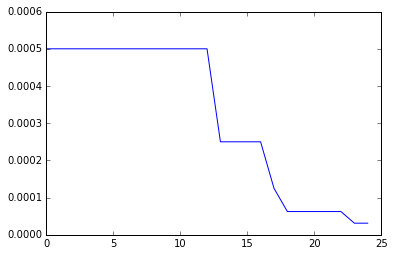

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(all_lr)

---

---

---